MacBook runtime: Wall time: 1min 52s

In [1]:
import numpy as np

sech_fwhm_conv = 1./2.6339157938
t_width = 0.1*sech_fwhm_conv # [τ]

print('t_width', t_width)

n = 2.0 # For a pulse area of nπ    
ampl = n/t_width/(2*np.pi) # Pulse amplitude [2π Γ]

print('ampl', ampl)

t_width 0.037966285875725786
ampl 8.384014365421665


In [2]:
mb_solve_json = """
{
  "atom": {
    "decays": [
      {
        "channels": [[0, 1]],
        "rate": 1.0
      }
    ],
    "energies": [],
    "fields": [
      {
        "coupled_levels": [[0, 1]],
        "detuning": 0.0,
        "detuning_positive": true,
        "label": "probe",
        "rabi_freq": 8.384014365421665,
        "rabi_freq_t_args": {
          "ampl": 1.0,
          "centre": 0.0,
          "width": 0.037966285875725786
        },
        "rabi_freq_t_func": "sech"
      }
    ],
    "num_states": 2
  },
  "t_min": -0.2,
  "t_max": 1.0,
  "t_steps": 1200,
  "z_min": -0.2,
  "z_max": 1.2,
  "z_steps": 35,
  "z_steps_inner": 1,
  "num_density_z_func": "square",
  "num_density_z_args": {
    "on": 0.0,
    "off": 1.0,
    "ampl": 1.0
  },
  "interaction_strengths": [
    10.0
  ],
  "velocity_classes": null,
  "method": "mesolve",
  "opts": {},
  "savefile": "qu/mb-solve-two-sech-2pi-narrow-decay"
}
"""

In [3]:
from maxwellbloch import mb_solve

In [4]:
mb_solve_00 = mb_solve.MBSolve().from_json_str(mb_solve_json)

np.trapz(mb_solve_00.Omegas_zt[0,0,:], mb_solve_00.tlist)/np.pi

(1.993436413892034+0j)

In [5]:
%time Omegas_zt, states_zt = mb_solve_00.mbsolve(step='ab', recalc=False)

Loaded tuple object.
CPU times: user 7.23 ms, sys: 10.3 ms, total: 17.5 ms
Wall time: 18.6 ms


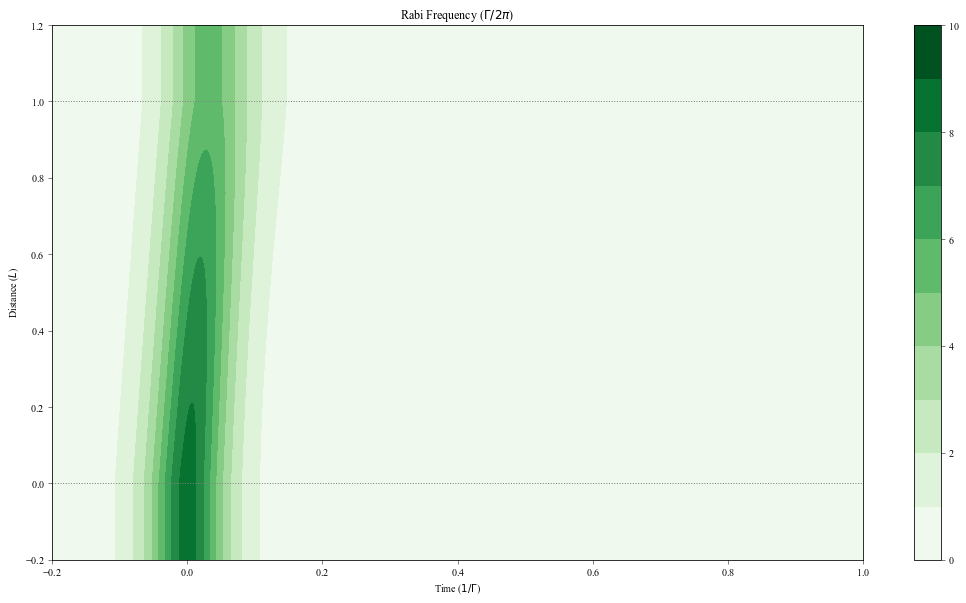

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np

fig, ax = plt.subplots(figsize=(16, 9))
cmap_range = np.linspace(0.0, 10.0, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[0]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Greens)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_xlabel('Time ($1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
for y in [0.0, 1.0]:
    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.colorbar(cf);
plt.savefig('images/mb-solve-two-sech-2pi-narrow-decay.png')

Text(0,0.5,'Pulse Area ($\\pi$)')

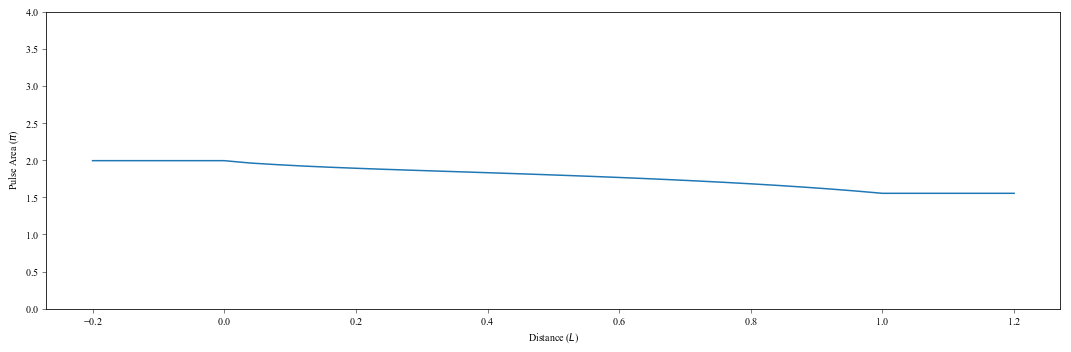

In [7]:
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(mb_solve_00.zlist, mb_solve_00.fields_area()[0]/np.pi)
ax.set_ylim([0.0, 4.0])
ax.set_xlabel('Distance ($L$)')
ax.set_ylabel('Pulse Area ($\pi$)')